<a href="https://colab.research.google.com/github/vignesh12c/DataViz_analytics_portfolio/blob/main/Business_caseStudy_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing rrequired libraries
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#downloading the dataset
!gdown '1-wpy2Kvz_G1L6XKbvIMmlseHpxjc1nQD'

Downloading...
From: https://drive.google.com/uc?id=1-wpy2Kvz_G1L6XKbvIMmlseHpxjc1nQD
To: /content/netflix_dataset_4.csv
100% 3.40M/3.40M [00:00<00:00, 22.6MB/s]


In [ ]:
df = pd.read_csv('netflix_dataset_4.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# **1. Defining Problem Statement and Analysing basic metrics **

To analyse netflix data about their movies,tv shows to provide insights for business improvement.
Analyse:
 distribution of directors and cast,
 distribution of duration of movies and tv series,
 determine content preference for each country,
 determine the most famous cast and directors for each country,
 movies vs tv series


# **2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary **

The dataset contains nested values in director,cast,country and lissted_in columns. so first unnesting dataset and then proceeding with analysis.

In [ ]:
#dropping the NaN values from director column and exploding it. NaN values causes incorrect exploding of dataset hence excluding it and then including
#them again after exploding.
#same steps carried for other columns
nan_rows = df[df['director'].isna()]
non_nan_rows = df.dropna(subset=['director'])
non_nan_rows['director'] = non_nan_rows['director'].str.split(',')
exploded_rows = non_nan_rows.explode('director')
result = pd.concat([exploded_rows, nan_rows], ignore_index=True)
result

<ipython-input-4-c8101f236397>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_rows['director'] = non_nan_rows['director'].str.split(',')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
3,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
4,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
9607,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
9608,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
9609,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
9610,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [ ]:
nan_rows = result[result['cast'].isna()]
non_nan_rows = result.dropna(subset=['cast'])
non_nan_rows['cast'] = non_nan_rows['cast'].str.split(',')
exploded_rows = non_nan_rows.explode('cast')
result = pd.concat([exploded_rows, nan_rows], ignore_index=True)
result

<ipython-input-5-7258eefce00f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_rows['cast'] = non_nan_rows['cast'].str.split(',')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
1,s3,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,Samuel Jouy,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s3,TV Show,Ganglands,Julien Leclercq,Nabiha Akkari,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s3,TV Show,Ganglands,Julien Leclercq,Sofia Lesaffre,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
70807,s8606,TV Show,Top Grier,NaN,NaN,United States,"December 31, 2018",2018,TV-MA,3 Seasons,Reality TV,Social media star Hayes Grier returns to North...
70808,s8610,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,"International TV Shows, Reality TV",Australia's toughest tow truck operators work ...
70809,s8701,TV Show,Wartime Portraits,NaN,NaN,Poland,"September 15, 2016",2014,TV-MA,1 Season,"Docuseries, International TV Shows","Part live-action and part animation, this visu..."
70810,s8756,TV Show,Women Behind Bars,NaN,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...


In [ ]:
nan_rows = result[result['country'].isna()]
non_nan_rows = result.dropna(subset=['country'])
non_nan_rows['country'] = non_nan_rows['country'].str.split(',')
exploded_rows = non_nan_rows.explode('country')
result = pd.concat([exploded_rows, nan_rows], ignore_index=True)
result

<ipython-input-6-9e7a06d75835>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_rows['country'] = non_nan_rows['country'].str.split(',')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
2,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Burkina Faso,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Germany,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
89410,s7813,TV Show,Queens of Comedy,NaN,NaN,NaN,"May 1, 2018",2017,TV-MA,1 Season,"International TV Shows, Stand-Up Comedy & Talk...",Eight women perform in front of celebrity judg...
89411,s8110,TV Show,Strongland,NaN,NaN,NaN,"January 18, 2019",2018,TV-PG,1 Season,"Docuseries, International TV Shows",From Spain's countryside to Scotland's stony t...
89412,s8200,TV Show,The Bachelor,NaN,NaN,NaN,"December 1, 2019",2009,TV-14,1 Season,"Reality TV, Romantic TV Shows",A single man searches for his soulmate through...
89413,s8610,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,"International TV Shows, Reality TV",Australia's toughest tow truck operators work ...


In [ ]:
nan_rows = result[result['listed_in'].isna()]
non_nan_rows = result.dropna(subset=['listed_in'])
non_nan_rows['listed_in'] = non_nan_rows['listed_in'].str.split(',')
exploded_rows = non_nan_rows.explode('listed_in')
result = pd.concat([exploded_rows, nan_rows], ignore_index=True)
result

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
1,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
2,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
3,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
4,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8610,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,International TV Shows,Australia's toughest tow truck operators work ...
202061,s8610,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,Reality TV,Australia's toughest tow truck operators work ...
202062,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g..."
202063,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g..."


In [ ]:
#converting to datetime format from string.
res['date_added'] = pd.to_datetime(res['date_added'].str.replace(' ', '', regex=False), format='%B%d,%Y')
res['date_added']

,date_added
0,2021-09-24
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
202060,2017-12-27
202061,2017-12-27
202062,2019-07-01
202063,2019-07-01


In [ ]:
#extracting only th values from duration and converting to int
res['duration'] = pd.to_numeric(res['duration'].str.extract('(\d+)')[0], errors='coerce')


In [ ]:
res['duration']

,duration
0,125.0
1,125.0
2,125.0
3,125.0
4,125.0
...,...
202060,1.0
202061,1.0
202062,2.0
202063,2.0


In [ ]:
res

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125.0,Dramas
1,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125.0,Independent Movies
2,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125.0,International Movies
3,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,125.0,Dramas
4,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021-09-24,1993,TV-MA,125.0,Independent Movies
...,...,...,...,...,...,...,...,...,...,...,...
202060,s8610,TV Show,Towies,Martin Scorsese,Alfred Molina,United States,2017-12-27,2016,TV-MA,1.0,International TV Shows
202061,s8610,TV Show,Towies,Martin Scorsese,Alfred Molina,United States,2017-12-27,2016,TV-MA,1.0,Reality TV
202062,s8804,TV Show,Zombie Dumb,Martin Scorsese,Alfred Molina,United States,2019-07-01,2018,TV-Y7,2.0,Kids' TV
202063,s8804,TV Show,Zombie Dumb,Martin Scorsese,Alfred Molina,United States,2019-07-01,2018,TV-Y7,2.0,Korean TV Shows


In [ ]:
#saving the dataset for future use
result.to_csv('netflix_dataset_5.csv', index=False)

In [ ]:
!gdown '11Li3kZ5cpYW00PxwMDptvu4EO5EYm5qv'

Downloading...
From: https://drive.google.com/uc?id=11Li3kZ5cpYW00PxwMDptvu4EO5EYm5qv
To: /content/netflix_dataset_5.csv
100% 53.2M/53.2M [00:00<00:00, 107MB/s]


In [ ]:
result = pd.read_csv('netflix_dataset_5.csv')

<ipython-input-5-3c7d50626e04>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv('netflix_dataset_5.csv')


In [ ]:
res = result.copy()
res

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
1,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
2,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
3,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
4,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8610,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,International TV Shows,Australia's toughest tow truck operators work ...
202061,s8610,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,Reality TV,Australia's toughest tow truck operators work ...
202062,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g..."
202063,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g..."


In [ ]:
res.shape

(202065, 12)

There are around 2 lakh columns after exploding all columns including the NaN values

In [ ]:
#number of null values in each column
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


director,cast,country have high number of null values.
The null values is filled using the mode of that column.

A better way to fill the director and cast columns would be to find the most frequent pairs of director and cast and then fill according that.
same goes for country column. They can be paired with cast.

But this case study only uses the mode to fill the null values.

In [ ]:
#filling na values with mode except for duration column
res.loc[:, res.columns != 'duration'] = res.loc[:, res.columns != 'duration'].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
res.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,3


In [ ]:
#filling null values of duration for movies and tv series seperately
#duration = res.groupby('type')['duration'].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))


In [ ]:
#dur = duration.reset_index()
#dur['duration']

,duration
0,125
1,125
2,125
3,125
4,125
...,...
202060,1
202061,1
202062,2
202063,2


In [ ]:
#res['duration'] = dur['duration']

In [ ]:
res

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
1,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
2,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
3,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
4,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8610,TV Show,Towies,Martin Scorsese,Alfred Molina,United States,"December 27, 2017",2016,TV-MA,1 Season,International TV Shows,Australia's toughest tow truck operators work ...
202061,s8610,TV Show,Towies,Martin Scorsese,Alfred Molina,United States,"December 27, 2017",2016,TV-MA,1 Season,Reality TV,Australia's toughest tow truck operators work ...
202062,s8804,TV Show,Zombie Dumb,Martin Scorsese,Alfred Molina,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g..."
202063,s8804,TV Show,Zombie Dumb,Martin Scorsese,Alfred Molina,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g..."


In [ ]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      202065 non-null  object        
 4   cast          202065 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    202065 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        202065 non-null  object        
 9   duration      202065 non-null  float64       
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 18.5+ MB


In [ ]:
res.drop('description',axis=1,inplace=True)

KeyError: "['description'] not found in axis"

In [ ]:
res.to_csv('netflix_dataset_6.csv', index=False)

In [ ]:
!gdown '1oMeqMA5b1GhyzX7WFrfFcLxkmDiqrFUw'

Downloading...
From: https://drive.google.com/uc?id=1oMeqMA5b1GhyzX7WFrfFcLxkmDiqrFUw
To: /content/netflix_dataset_6.csv
100% 21.5M/21.5M [00:00<00:00, 58.6MB/s]


In [ ]:
res = pd.read_csv('netflix_dataset_6.csv')

In [ ]:
res

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021,1993,TV-MA,125.0,Dramas
1,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021,1993,TV-MA,125.0,Independent Movies
2,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021,1993,TV-MA,125.0,International Movies
3,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021,1993,TV-MA,125.0,Dramas
4,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,2021,1993,TV-MA,125.0,Independent Movies
...,...,...,...,...,...,...,...,...,...,...,...
202060,s8610,TV Show,Towies,Martin Scorsese,Alfred Molina,United States,2017,2016,TV-MA,1.0,International TV Shows
202061,s8610,TV Show,Towies,Martin Scorsese,Alfred Molina,United States,2017,2016,TV-MA,1.0,Reality TV
202062,s8804,TV Show,Zombie Dumb,Martin Scorsese,Alfred Molina,United States,2019,2018,TV-Y7,2.0,Kids' TV
202063,s8804,TV Show,Zombie Dumb,Martin Scorsese,Alfred Molina,United States,2019,2018,TV-Y7,2.0,Korean TV Shows


# **3. Non-Graphical Analysis: Value counts and unique attributes **

In [ ]:
#no. of movies and tv series by each year
res['date_added'] = res['date_added'].dt.year
unique_counts = res.groupby(['type','date_added'])['title'].nunique()
print(unique_counts)

type     date_added
Movie    2008             1
         2009             2
         2010             1
         2011            13
         2012             3
         2013             6
         2014            19
         2015            56
         2016           253
         2017           839
         2018          1237
         2019          1424
         2020          1284
         2021           993
TV Show  2008             1
         2013             5
         2014             5
         2015            26
         2016           176
         2017           349
         2018           412
         2019           592
         2020           605
         2021           505
Name: title, dtype: int64


number of movies added have peaked in 2019 and after that there has been gradual decrease.
since 2015, there has been increase in TV series. Tv shows are becoming more and more popular

In [ ]:
#no. of movies directed by each director
res.groupby('director')['title'].nunique().sort_values(ascending=False)

,title
director,
Martin Scorsese,2646
Rajiv Chilaka,22
Raúl Campos,18
Jan Suter,18
Suhas Kadav,16
...,...
J. Davis,1
J. Lee Thompson,1
J. Michael Long,1


 Martin Scorsese, Rajiv Chilaka,Raúl Campos,Jan Suter,Suhas Kadav have directed the most number of movies/series in netflix

 the data is heavly skewed with martin scorsese as all the missing values has been filled with the mode



In [ ]:
#no. of movies by each actor
res.groupby('cast')['title'].nunique().sort_values(ascending=False)

,title
cast,
Alfred Molina,841
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28
...,...
João Côrtes,1
João Assunção,1
Joziah Lagonoy,1


In [ ]:
#no. of movies/series in each genres
genres = res.groupby('listed_in')['title'].nunique().sort_values(ascending=False)
genres

,title
listed_in,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
TV Sci-Fi & Fantasy,1


In [ ]:
genres.tail(20)

,title
listed_in,
Classic Movies,36
Children & Family Movies,36
Stand-Up Comedy & Talk Shows,34
Romantic TV Shows,32
Classic & Cult TV,22
Stand-Up Comedy & Talk Shows,22
Anime Features,21
Independent Movies,20
Music & Musicals,18


international movies, dramas,comedies are more popular.
To increase awareness for LGBTQ community, more movies/series can be made in that genre.
Also, there are huge following for sports. so movies/series related to sports can increease the revenue multifold.


In [ ]:
#no. of movies/series in each rating
res.groupby('rating')['title'].nunique().sort_values(ascending=False)

,title
rating,
TV-MA,3211
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


# **4.  Visual Analysis - Univariate, Bivariate after pre-processing of the data  AND                                                                      6. Insights based on Non-Graphical and Visual Analysis AND 7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it**

In [ ]:
def plot_bar(cols):
  for col in cols:
    if col == 'date_added':
      data = res.groupby(['type',col])['title'].nunique().reset_index(name='counts')
      sns.barplot(x=col, y='counts', data=data, hue= 'type', color='green')
    elif col in ['country','listed_in','cast','director']:
      data = res.groupby(col)['title'].nunique().reset_index(name='counts').sort_values(by='counts',ascending=False).head(10)
      sns.barplot(x=col, y='counts', data=data, hue= None, color='green')
      plt.xticks(rotation=90)
    elif col == 'duration':
      fig,ax = plt.subplots(1,2,figsize=(10,5))
      data = res[res['type']=='TV Show']
      data = data.groupby('title')['duration'].mean()
      hist = sns.histplot(data=data, kde = False, color ='red', bins = 20, ax=ax[0])
      hist.set_xlabel('no. of seasons')
      hist.set_ylabel('no. of tv shows')
      hist.set_title('Distribution of Duration of TV Shows')

      data2 = res[res['type']=='Movie']
      data2 = data2.groupby('title')['duration'].mean()
      hist = sns.histplot(data=data2, kde = True, color ='red', bins = 10, ax=ax[1])
      hist.set_xlabel('mins')
      hist.set_ylabel('no. of movies')
      hist.set_title('Distribution of Duration of Movies')
    else:
      data = res.groupby(col)['title'].nunique().reset_index(name='counts')
      sns.barplot(x=col, y='counts', data=data, hue= None, color='green')
      plt.xticks(rotation=90)


    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

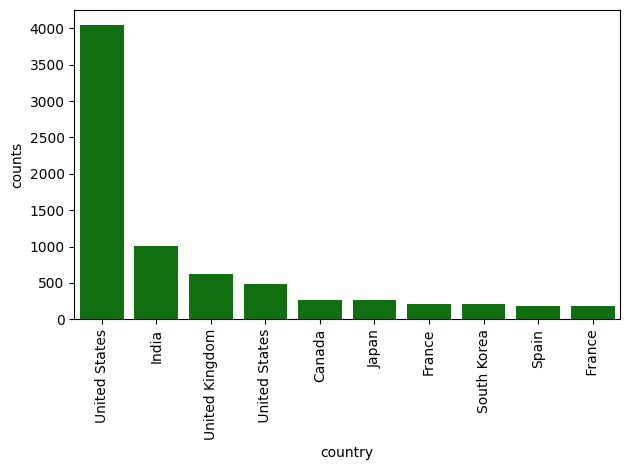

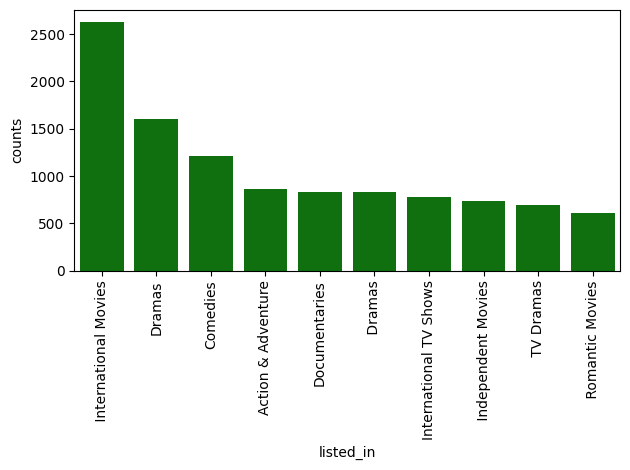

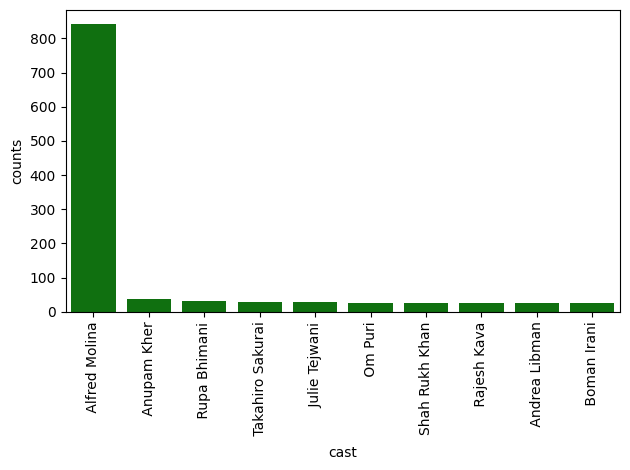

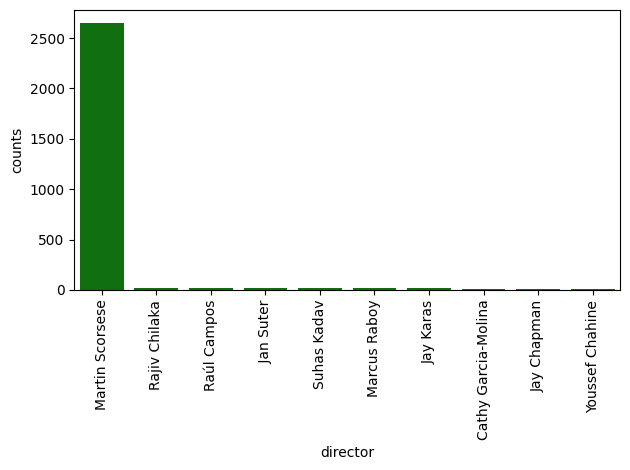

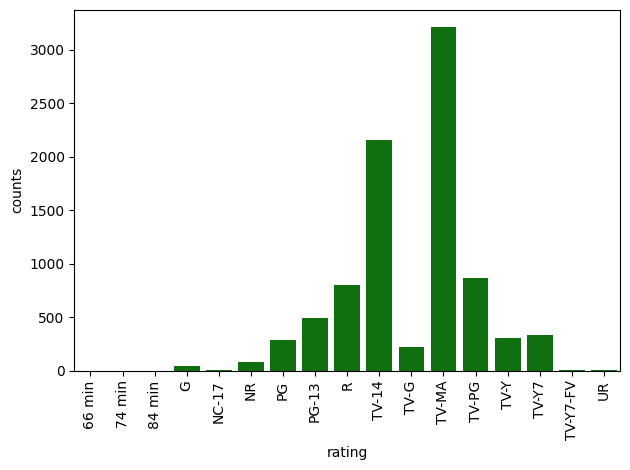

<ipython-input-17-66d45956afa5>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.barplot(x=col, y='counts', data=data, hue= 'type', color='green')


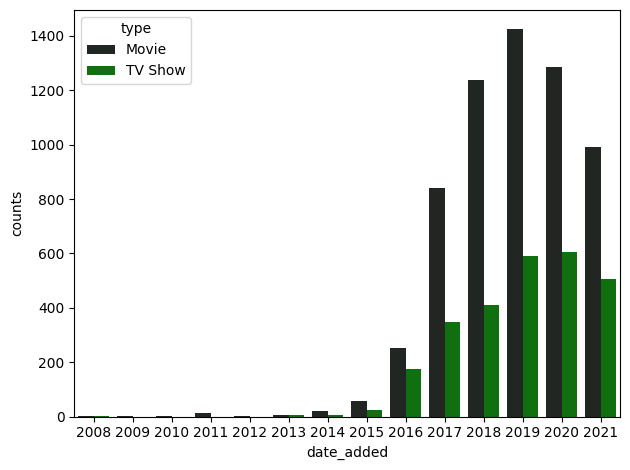

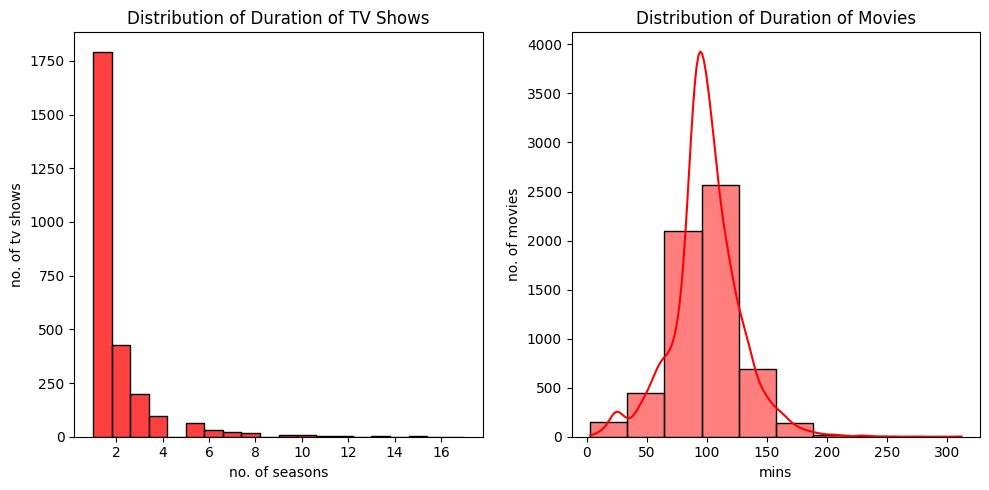

In [ ]:
plot_bar(['country','listed_in','cast','director','rating','date_added','duration'])

Shorter tv shows are more popular than those that run for more than a decade

number of movies released in netflix after 2019 has been decreasing.
TV shows are increasing at the same time.

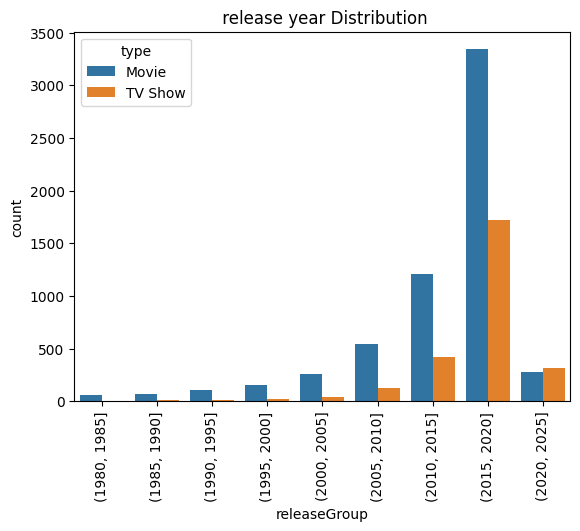

In [ ]:
res2 = res.copy()
#res['release_year'].to_datetime()
bins = range(1980,2026,5)
#labels = [str(x) for x in bins]   # Define corresponding labels
data = res.groupby(['title','release_year','type']).size().reset_index(name='counts')

# Create a new column 'AgeGroup' based on the 'age' column
data['releaseGroup'] = pd.cut(data['release_year'], bins=bins)

# Plot the count of each AgeGroup category
sns.countplot(x='releaseGroup', data=data,hue= 'type')
plt.xticks(rotation=90)

# Set title and show the plot
plt.title(" release year Distribution")
plt.show()

There has been steep rise in number of movies/series released over the years.

In [ ]:
!gdown '11Li3kZ5cpYW00PxwMDptvu4EO5EYm5qv'

Downloading...
From: https://drive.google.com/uc?id=11Li3kZ5cpYW00PxwMDptvu4EO5EYm5qv
To: /content/netflix_dataset_5.csv
100% 53.2M/53.2M [00:00<00:00, 198MB/s]


In [ ]:
df = pd.read_csv('netflix_dataset_5.csv')

<ipython-input-27-7e06be3bc9f0>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('netflix_dataset_5.csv')


In [ ]:
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
1,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
2,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
3,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
4,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Ghana,"September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8610,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,International TV Shows,Australia's toughest tow truck operators work ...
202061,s8610,TV Show,Towies,NaN,NaN,NaN,"December 27, 2017",2016,TV-MA,1 Season,Reality TV,Australia's toughest tow truck operators work ...
202062,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g..."
202063,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g..."


In [ ]:
df2 =df.copy()
df2['date_added'] = pd.to_datetime(df2['date_added'].str.replace(' ', '', regex=False), format='%B%d,%Y')
df2['date_added']

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
8802,2019-11-20
8803,2019-07-01
8804,2019-11-01
8805,2020-01-11


In [ ]:
df2['year'] = df2['date_added'].dt.year
df2['month'] = df2['date_added'].dt.month
df2['day'] = df2['date_added'].dt.day

In [ ]:

data2 = df2.groupby('day')['title'].count().reset_index().sort_values(by='title',ascending=False)
data2

,day,title
0,1.0,2212
14,15.0,687
1,2.0,325
15,16.0,289
30,31.0,274
19,20.0,249
18,19.0,243
4,5.0,231
21,22.0,230
9,10.0,214


Releasing movies/series on the first day of the month seems to be most popular. This may be linked with people wanting to start something new or fresh at the start of a month. for eg. people may want to start new series after they got bored with the last one. Or they may want motivational movies to kickstart something they wanted to do for a very long time.

In [ ]:
data = df2.groupby('month')['title'].count().reset_index().sort_values(by='title',ascending=False)
data

,month,title
6,7.0,827
11,12.0,813
8,9.0,770
3,4.0,764
9,10.0,760
7,8.0,755
2,3.0,742
0,1.0,738
5,6.0,728
10,11.0,705


releasing movies/series during holidays may seem to increase the viewrship as december month has more releases dahn any other months  

In [ ]:
#most viewed genre in each country
data = res.groupby(['title','country','listed_in'])['show_id'].size().reset_index(name='counts')
data = data.groupby(['country','listed_in']).size().reset_index(name='counts2')
sorted_data = data.sort_values(['country', 'counts2'], ascending=[True, False])
top_data = sorted_data.groupby('country').head(1)
top_data

,country,listed_in,counts2
0,Afghanistan,International Movies,1
2,Albania,International Movies,1
6,Algeria,International Movies,3
9,Angola,International Movies,1
14,Argentina,International Movies,12
...,...,...,...
2406,Uruguay,International Movies,8
2415,Venezuela,International Movies,2
2419,Vietnam,International Movies,7
2428,West Germany,International Movies,1


In [ ]:
#grouping countries according to their most viewed genres
nested_df = top_data.groupby('listed_in')['country'].apply(list).reset_index()
nested_df

,listed_in,country
0,Classic Movies,"[ East Germany, West Germany]"
1,Comedies,"[ Cayman Islands, Finland, Mauritius]"
2,Dramas,"[ Liechtenstein, Malawi, Syria]"
3,Faith & Spirituality,[ Vatican City]
4,Independent Movies,"[ Austria, Bangladesh, Burkina Faso, Croati..."
5,International Movies,"[ Afghanistan, Albania, Algeria, Angola, A..."
6,International TV Shows,"[ Cuba, Luxembourg, Puerto Rico, Senegal, Ukra..."
7,Kids' TV,[Belarus]
8,Korean TV Shows,[South Korea]
9,LGBTQ Movies,[Greece]


In [ ]:
#content available in each country
content_available = sorted_data.groupby('country')['listed_in'].apply(list).reset_index()
content_available

,country,listed_in
0,Afghanistan,"[ International Movies, Documentaries]"
1,Albania,"[ International Movies, Dramas]"
2,Algeria,"[ International Movies, Dramas, Dramas, Inde..."
3,Angola,"[ International Movies, Action & Adventure]"
4,Argentina,"[ International Movies, Dramas, Comedies, Dra..."
...,...,...
191,Uruguay,"[ International Movies, Documentaries, Dramas..."
192,Venezuela,"[ International Movies, Documentaries]"
193,Vietnam,"[ International Movies, Dramas, Action & Adve..."
194,West Germany,"[ International Movies, Documentaries]"


In [ ]:
#how much variety of content each country consumes?
variety = sorted_data.groupby('country')['listed_in'].count().reset_index(name='content').sort_values(by='content',ascending=False)
variety

,country,content
190,United States,69
105,United States,58
189,United Kingdom,57
121,Canada,56
112,Australia,47
...,...,...
176,Somalia,1
9,Bahamas,1
101,Uganda,1
69,Nicaragua,1


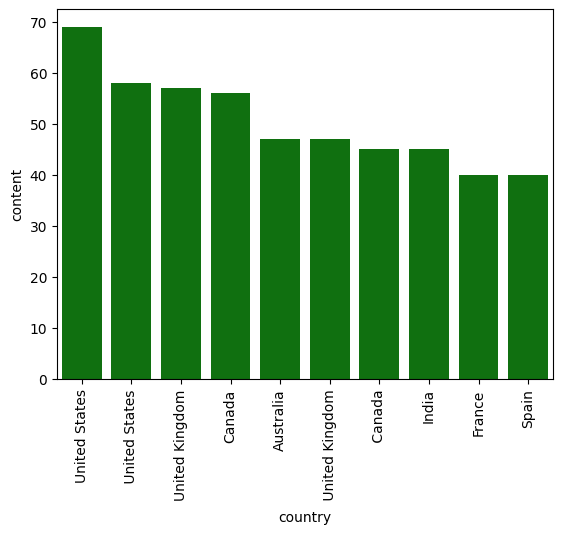

In [ ]:
sns.barplot(x='country', y='content', data=variety.head(10), hue= None, color='green')
plt.xticks(rotation=90)
plt.show()

Top 10 countries in terms of variety of contents viewed.
Netflix should focus on customers from these countries as they view varied content which helps netflix produce different and quality content which inturn will increase revenue

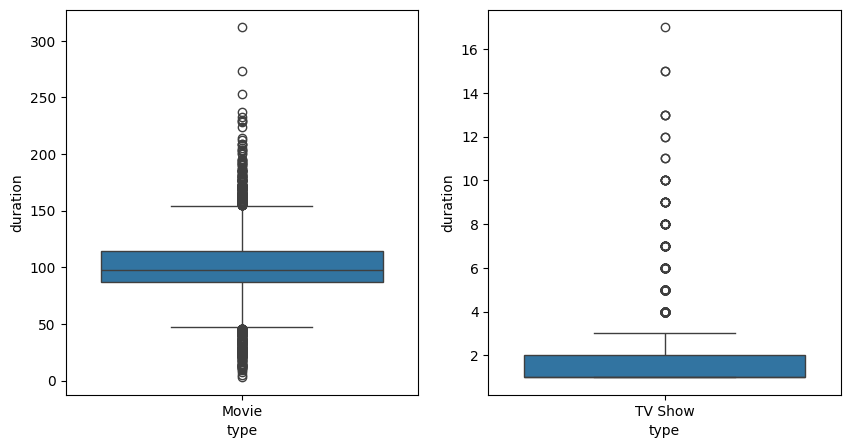

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
data = res.groupby(['title','duration','type'])['show_id'].size().reset_index(name='counts')
sns.boxplot(x='type', y='duration', data=data[data['type']=='Movie'],ax=ax[0])
sns.boxplot(x='type', y= 'duration',data=data[data['type']=='TV Show'],ax=ax[1])
plt.show()

mean duration of movies is around 100 mins but there are lot od outliers. so there is no suggested duration for movies that viewers prefer
tv shows generally tend to have at most 4 seasons but very few outliers

In [ ]:
#most frequent director-actor pairs
data= res.groupby(['title','director','cast'])['show_id'].size().reset_index(name='counts')
data = data.groupby(['cast','director']).size().reset_index(name='counts2')
data = data.sort_values(by='counts2',ascending=False)
data[data['counts2']>=10]

,cast,director,counts2
2310,Alfred Molina,Martin Scorsese,353
50217,Takahiro Sakurai,Martin Scorsese,23
42063,Rajesh Kava,Rajiv Chilaka,19
26114,Julie Tejwani,Rajiv Chilaka,19
23637,Jigna Bhardwaj,Rajiv Chilaka,18
44665,Rupa Bhimani,Rajiv Chilaka,18
16889,Fortune Feimster,Martin Scorsese,16
55096,Yuki Kaji,Martin Scorsese,16
63376,Vatsal Dubey,Rajiv Chilaka,16
26271,Junichi Suwabe,Martin Scorsese,16


# **5. Missing Value & Outlier check**

director,cast and country has large number of null values.
the mode of the column is used to fill those values.
but it is not accurate.
More appropriate method is to find the most frequent pairs of director and actor and then fill those missing values according to the director/cast.


# **8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand**

1. Netflix should produce more short term TV shows than movies as customers are prefering TV shows
2. United states, UK,India,France,Australia, Canada,Spain have the most valuable customers. Netflix should cater to their needs more.
3. Netflix should focus on producing documetries, TV dramas, internaltional TV shows and International movies as many countries watch these type of contents
